# Trials Data

In [36]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

dataset = 'D1'

df = pd.read_csv('alltrials.csv', sep=';')
data = df[df['f1']!=0]

testD = data[data['dataset']==dataset]
trainD = data[data['dataset']!=dataset]


In [2]:
features = ['clustering', 'lm', 'k', 'threshold', 'InputEntityProfiles', 'NumberOfAttributes', 'NumberOfDistinctValues', 
            'NumberOfNameValuePairs', 'AverageNVPairsPerEntity', 'AverageDistinctValuesPerEntity', 
            'AverageNVpairsPerAttribute', 'AverageDistinctValuesPerAttribute', 'NumberOfMissingNVpairs', 
            'AverageValueLength', 'AverageValueTokens', 'MaxValuesPerEntity']

y_train = trainD[['f1']]
X_train = trainD[features]

X_test = testD[features]
y_test = testD[['f1']]

Transform categorigal variables

In [3]:
X_train_dummy = pd.get_dummies(X_train)
X_test_dummy = pd.get_dummies(X_test)

dummy_features = X_train_dummy.columns

In [25]:
X_train_dummy

,k,threshold,InputEntityProfiles,NumberOfAttributes,NumberOfDistinctValues,NumberOfNameValuePairs,AverageNVPairsPerEntity,AverageDistinctValuesPerEntity,AverageNVpairsPerAttribute,AverageDistinctValuesPerAttribute,...,MaxValuesPerEntity,clustering_BestMatchClustering,clustering_ConnectedComponentsClustering,clustering_KiralyMSMApproximateClustering,clustering_UniqueMappingClustering,lm_sdistilroberta,lm_sent_glove,lm_sminilm,lm_smpnet,lm_st5
4050,23,0.557313,2152,3,4383,4876,2.27,2.04,1625.33,1461.0,...,3,False,True,False,False,True,False,False,False,False
4051,1,0.050000,2152,3,4383,4876,2.27,2.04,1625.33,1461.0,...,3,False,False,False,True,False,False,False,False,True
4054,25,0.725000,2152,3,4383,4876,2.27,2.04,1625.33,1461.0,...,3,False,False,False,True,False,False,True,False,False
4055,23,0.557313,2152,3,4383,4876,2.27,2.04,1625.33,1461.0,...,3,False,True,False,False,True,False,False,False,False
4056,1,0.050000,2152,3,4383,4876,2.27,2.04,1625.33,1461.0,...,3,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41028,82,0.202816,50797,10,424346,971445,19.12,8.35,97144.50,42434.6,...,1306,False,False,True,False,False,False,False,False,True
41029,77,0.092164,50797,10,424346,971445,19.12,8.35,97144.50,42434.6,...,1306,False,False,True,False,False,False,False,True,False
41030,3,0.461966,50797,10,424346,971445,19.12,8.35,97144.50,42434.6,...,1306,False,False,False,True,False,False,False,True,False
41032,79,0.531726,50797,10,424346,971445,19.12,8.35,97144.50,42434.6,...,1306,True,False,False,False,False,False,False,False,True


In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dummy)
X_test_scaled = scaler.transform(X_test_dummy)

# AutoML

In [5]:
import autosklearn.regression as autosklearn

In [6]:
# Initialize Auto-sklearn for regression
automl = autosklearn.AutoSklearnRegressor(
    time_left_for_this_task=60*60,  # Total time for the AutoML process
    per_run_time_limit=300,       # Time for each model
    memory_limit=6144, 
    # verbosity=2,
    # ensemble_size=1               # Use single best model
)

# Fit the model
automl.fit(X_train_scaled, y_train, dataset_name='trials_optuna')

# Predict using the best model
y_pred = automl.predict(X_test_scaled)

# Evaluate the predictions
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Display the details of the best model
print(automl.show_models())

R2 Score: -0.8754964533503049
Mean Absolute Error: 14.105377592526095
Mean Squared Error: 270.0606810919999
{2: {'model_id': 2, 'rank': 1, 'cost': 0.0007713208905567592, 'ensemble_weight': 0.66, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f3d6ba3bf10>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f3d6ba8e8b0>, 'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7f3d6ba8e760>, 'sklearn_regressor': RandomForestRegressor(max_features=1.0, n_estimators=512, n_jobs=1,
                      random_state=1, warm_start=True)}, 6: {'model_id': 6, 'rank': 2, 'cost': 0.007329917856385926, 'ensemble_weight': 0.02, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f3d6bad4ca0>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocess

In [21]:
automl.leaderboard(top_k="all", detailed=True)

,rank,ensemble_weight,type,cost,duration,config_id,train_loss,seed,start_time,end_time,budget,status,data_preprocessors,feature_preprocessors,balancing_strategy,config_origin
model_id,,,,,,,,,,,,,,,,
2,1,0.66,random_forest,0.000771,72.952517,1,8.037156e-05,0,1.714458e+09,1.714458e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],None,Initial design
27,2,0.18,gradient_boosting,0.001365,35.315460,26,7.927166e-04,0,1.714461e+09,1.714461e+09,0.0,StatusType.SUCCESS,[],[select_percentile_regression],None,Initial design
42,3,0.14,k_nearest_neighbors,0.002525,34.047636,41,2.775558e-15,0,1.714461e+09,1.714461e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],None,Local Search
6,4,0.02,gradient_boosting,0.007330,20.857747,5,4.545933e-03,0,1.714459e+09,1.714459e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],None,Initial design


In [8]:
from pprint import pprint

pprint(automl.show_models(), indent=4)

{   2: {   'cost': 0.0007713208905567592,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f3d6ba3bf10>,
           'ensemble_weight': 0.66,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f3d6ba8e8b0>,
           'model_id': 2,
           'rank': 1,
           'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7f3d6ba8e760>,
           'sklearn_regressor': RandomForestRegressor(max_features=1.0, n_estimators=512, n_jobs=1,
                      random_state=1, warm_start=True)},
    6: {   'cost': 0.007329917856385926,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f3d6bad4ca0>,
           'ensemble_weight': 0.02,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice ob

In [28]:
res = X_test[['lm', 'clustering', 'k', 'threshold']]

# add y_pred and y_test to res
res['Predicted'] = y_pred
res['True'] = y_test

res.sort_values(by='True', ascending=False)

,lm,clustering,k,threshold,Predicted,True
1344,smpnet,ConnectedComponentsClustering,86,0.907813,47.383837,77.0833
2556,st5,ConnectedComponentsClustering,53,0.882308,52.533068,77.0732
2591,st5,ConnectedComponentsClustering,53,0.882308,52.533068,77.0732
2501,st5,ConnectedComponentsClustering,53,0.882308,52.533068,77.0732
2674,st5,ConnectedComponentsClustering,53,0.882308,52.533068,77.0732
...,...,...,...,...,...,...
4030,smpnet,ConnectedComponentsClustering,53,0.612326,22.623664,2.1978
2084,smpnet,ConnectedComponentsClustering,5,0.607468,31.046379,2.1978
3989,smpnet,ConnectedComponentsClustering,96,0.617439,23.557474,2.1978
2046,smpnet,ConnectedComponentsClustering,5,0.607468,31.046379,2.1978


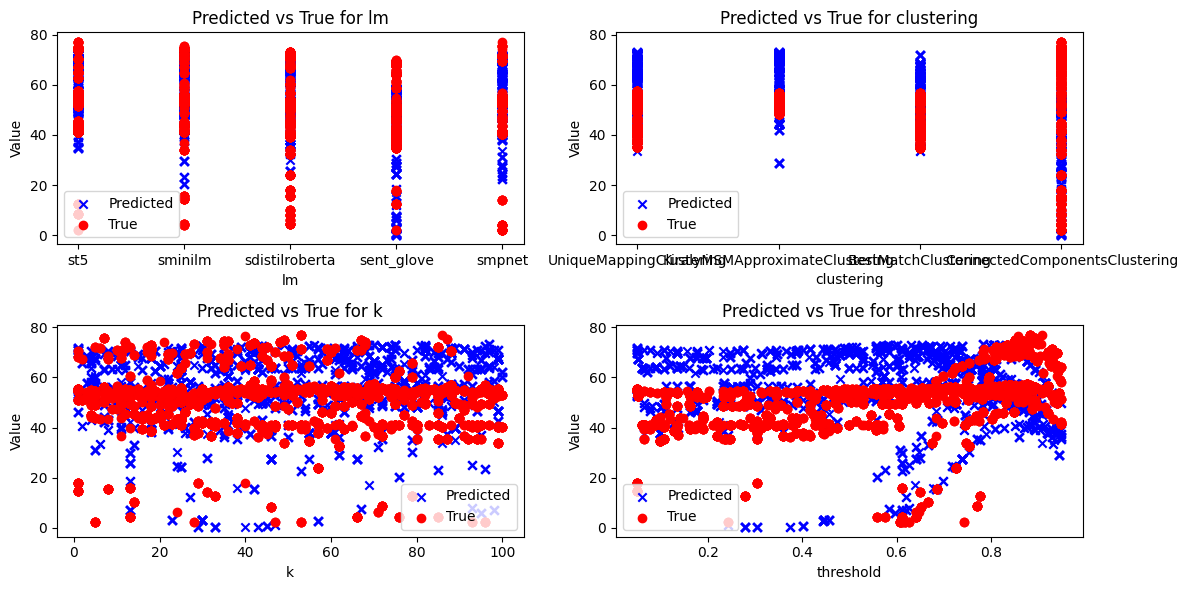

In [34]:
# Create scatter plots
plt.figure(figsize=(12, 6))
for i, feature in enumerate(['lm', 'clustering', 'k', 'threshold']):
    plt.subplot(2, 2, i+1)
    plt.scatter(res[feature], res['Predicted'], label='Predicted', color='blue', marker='x')
    plt.scatter(res[feature], res['True'], label='True', color='red')
    plt.xlabel(feature)
    plt.ylabel('Value')
    plt.title(f'Predicted vs True for {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

**Comments**

- Maybe it would be better to group F1, as Low, High,... because in a dataset the best would be 70 and in one other somenthing else.
- Also threshold can be grouped, as multiple thresholds for the same clustering, lm, k can yield the same result.

In [22]:
from autosklearn.pipeline.components.classification import ClassifierChoice

for name in ClassifierChoice.get_components():
    print(name)

adaboost
bernoulli_nb
decision_tree
extra_trees
gaussian_nb
gradient_boosting
k_nearest_neighbors
lda
liblinear_svc
libsvm_svc
mlp
multinomial_nb
passive_aggressive
qda
random_forest
sgd


In [9]:
from autosklearn.pipeline.components.regression import RegressorChoice

for name in RegressorChoice.get_components():
    print(name)

adaboost
ard_regression
decision_tree
extra_trees
gaussian_process
gradient_boosting
k_nearest_neighbors
liblinear_svr
libsvm_svr
mlp
random_forest
sgd


In [10]:
from autosklearn.pipeline.components.feature_preprocessing import (
    FeaturePreprocessorChoice,
)

for name in FeaturePreprocessorChoice.get_components():
    print(name)

densifier
extra_trees_preproc_for_classification
extra_trees_preproc_for_regression
fast_ica
feature_agglomeration
kernel_pca
kitchen_sinks
liblinear_svc_preprocessor
no_preprocessing
nystroem_sampler
pca
polynomial
random_trees_embedding
select_percentile_classification
select_percentile_regression
select_rates_classification
select_rates_regression
truncatedSVD


In [11]:
from sklearn.inspection import plot_partial_dependence, permutation_importance

r = permutation_importance(automl, X_test, y_test, n_repeats=10, random_state=0)

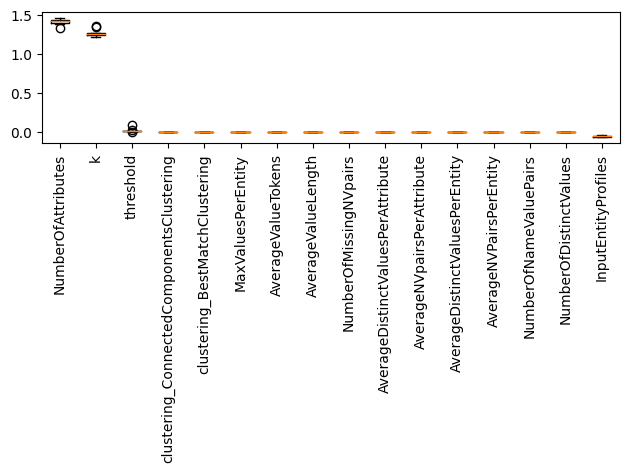

InputEntityProfiles: -0.060 +/- 0.009
NumberOfDistinctValues: 0.000 +/- 0.000
NumberOfNameValuePairs: 0.000 +/- 0.000
AverageNVPairsPerEntity: 0.000 +/- 0.000
AverageDistinctValuesPerEntity: 0.000 +/- 0.000
AverageNVpairsPerAttribute: 0.000 +/- 0.000
AverageDistinctValuesPerAttribute: 0.000 +/- 0.000
NumberOfMissingNVpairs: 0.000 +/- 0.000
AverageValueLength: 0.000 +/- 0.000
AverageValueTokens: 0.000 +/- 0.000
MaxValuesPerEntity: 0.000 +/- 0.000
clustering_BestMatchClustering: 0.000 +/- 0.000
clustering_ConnectedComponentsClustering: 0.000 +/- 0.000
threshold : 0.013 +/- 0.024
k         : 1.268 +/- 0.041
NumberOfAttributes: 1.412 +/- 0.037


In [12]:
sort_idx = r.importances_mean.argsort()[::-1]

plt.boxplot(
    r.importances[sort_idx].T, labels=[dummy_features[i] for i in sort_idx]
)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

for i in sort_idx[::-1]:
    print(
        f"{dummy_features[i]:10s}: {r.importances_mean[i]:.3f} +/- "
        f"{r.importances_std[i]:.3f}"
    )

In [17]:
X_train_scaled.shape

(33478, 23)

In [18]:
dummy_features

Index(['k', 'threshold', 'InputEntityProfiles', 'NumberOfAttributes',
       'NumberOfDistinctValues', 'NumberOfNameValuePairs',
       'AverageNVPairsPerEntity', 'AverageDistinctValuesPerEntity',
       'AverageNVpairsPerAttribute', 'AverageDistinctValuesPerAttribute',
       'NumberOfMissingNVpairs', 'AverageValueLength', 'AverageValueTokens',
       'MaxValuesPerEntity', 'clustering_BestMatchClustering',
       'clustering_ConnectedComponentsClustering',
       'clustering_KiralyMSMApproximateClustering',
       'clustering_UniqueMappingClustering', 'lm_sdistilroberta',
       'lm_sent_glove', 'lm_sminilm', 'lm_smpnet', 'lm_st5'],
      dtype='object')

In [16]:
features = [1, 2, 3, 4, 5, 6]
plot_partial_dependence(
    automl,
    X_train_scaled,
    features=features,
    grid_resolution=5,
    kind="both",
    feature_names=dummy_features,
)
# plt.tight_layout()
plt.show()

ValueError: X has 23 features, but ColumnTransformer is expecting 16 features as input.

In [37]:
features = [[1, 2]]
plot_partial_dependence(
    automl,
    X_train_scaled,
    features=features,
    grid_resolution=5,
    feature_names=dummy_features,
)
plt.tight_layout()
plt.show()

ValueError: X has 23 features, but ColumnTransformer is expecting 16 features as input.